In [1]:
import pandas as pd
import csv
import numpy as np
import requests
import matplotlib.pyplot as plt
import json
from wordcloud import WordCloud, STOPWORDS
from scipy.stats import linregress

In [2]:
kindle_csv = "./kindle_data_clean.csv"
kindle_data = pd.read_csv(kindle_csv)
kindle_data

,Unnamed: 0,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime
0,0,B000F83SZQ,"[0, 0]",5,I enjoy vintage books and movies so I enjoyed ...,"05 5, 2014",A1F6404F1VG29J,Avidreader,Nice vintage story,1399248000
1,1,B000F83SZQ,"[2, 2]",4,This book is a reissue of an old one; the auth...,"01 6, 2014",AN0N05A9LIJEQ,critters,Different...,1388966400
2,2,B000F83SZQ,"[2, 2]",4,This was a fairly interesting read. It had ol...,"04 4, 2014",A795DMNCJILA6,dot,Oldie,1396569600
3,3,B000F83SZQ,"[1, 1]",5,I'd never read any of the Amy Brewster mysteri...,"02 19, 2014",A1FV0SX13TWVXQ,"Elaine H. Turley ""Montana Songbird""",I really liked it.,1392768000
4,4,B000F83SZQ,"[0, 1]",4,"If you like period pieces - clothing, lingo, y...","03 19, 2014",A3SPTOKDG7WBLN,Father Dowling Fan,Period Mystery,1395187200
...,...,...,...,...,...,...,...,...,...,...
982592,982614,B00M13FNSS,"[2, 2]",5,Yasss hunny! This is a great read. That Dre is...,"07 23, 2014",A2Y66HD4J5S7QZ,Candi,A Hot Read Indeed!!,1406073600
982593,982615,B00M13FNSS,"[0, 0]",5,I ENJOYED THIS BOOK FROM BEGINNING TO END NOW ...,"07 23, 2014",A17YHECC8H9NEY,Margie,VERY GOOD BOOK,1406073600
982594,982616,B00M13FNSS,"[1, 1]",5,Great book! Cherika was a fool. She let that m...,"07 23, 2014",A20KO0BPMNREJL,Nicki,Great Read,1406073600
982595,982617,B00M13FNSS,"[0, 0]",5,When I say this was an excellent book please b...,"07 23, 2014",A1BQO66R6OLCCW,Nikey,Wow!!,1406073600


In [3]:
# 1-star reviews

kindle_1 = kindle_data.loc[kindle_data["overall"] == 1, :]
kindle_1

,Unnamed: 0,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime
64,64,B000FDJ0FS,"[2, 9]",1,He had an english accent which he seemed tryin...,"12 10, 2013",A39N0BN4B2Q7F,"Amazoner ""reader, thinker, doer""",In was thinking of getting until I heard the c...,1386633600
65,65,B000FDJ0FS,"[2, 2]",1,Somewhat of a disappointment. The articles we...,"12 13, 2012",A2XGPSOJXTW5JF,Anne,Wall Street Journal,1355356800
66,66,B000FDJ0FS,"[1, 1]",1,1. Costs more than delivered to your door pape...,"08 19, 2009",A1JZFGZEZVWQPY,"Carter H ""1amazonreviewer@gmail . com""",Just Not Up To WSJ Standards,1250640000
67,67,B000FDJ0FS,"[49, 57]",1,"The WSJ for Kindle is overpriced, and the cust...","02 26, 2008",A3775OP5VTX5ON,"Coolkayaker ""ck1""",The WSJ Has Gone to Pot!,1203984000
71,71,B000FDJ0FS,"[3, 3]",1,I read nearly all my books and magazines on Ki...,"11 23, 2012",A3L25SHGZKH8Q1,John K. Pearson,Not quite a disaster,1353628800
...,...,...,...,...,...,...,...,...,...,...
981347,981369,B00LTFG8EC,"[3, 6]",1,If you're going to call it BOOK 1 then make it...,"07 17, 2014",A34BOMIVCKSZOA,DKell,BOOK 1???,1405555200
981499,981521,B00LU32E1Y,"[3, 5]",1,I guess I keep expecting the magic from Bankro...,"07 16, 2014",A345FXEDB6FOBU,Amazon Customer,Huge Disappointment,1405468800
981583,981605,B00LU7JYC2,"[0, 0]",1,What a disappointment! It seemed a copy of bo...,"07 22, 2014",A1IWBKRIGHV1K1,MA EUGENIA NORIEGA C,What a disappointment!,1405987200
982277,982299,B00LYPIQRY,"[0, 1]",1,Let me start this review by saying I loved lov...,"07 21, 2014",A33NPY4WRP7ZR0,Irish_caia,I wanted to love it...,1405900800


In [4]:
word_list_1 = []
words_1 = ''
for review in kindle_1["reviewText"]:
    review_replace = review.replace(".", " ")
    review_replace = review_replace.replace("&#34;", " ")
    review_replace = review_replace.replace("*", " ")
    review_replace = review_replace.replace("(", " ")
    review_replace = review_replace.replace(")", " ")
    review_replace = review_replace.replace(",", " ")
    review_replace = review_replace.replace('''"''', " ")
    review_replace = review_replace.replace("?", " ")
    review_replace = review_replace.replace("!", " ")
    review_replace = review_replace.replace("/", " ")
    review_replace = review_replace.replace(":", " ")
#     word_split = review_replace.split(" ")
#     for word in word_split:
#         word = word.lower()
#         word_list_1.append(word)
    words_1 += review_replace

# len(word_list_1)

In [6]:
# word_df_1 = pd.DataFrame(word_list_1)

# word_df_1[0].value_counts()

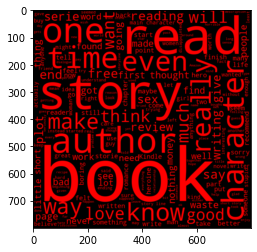

In [27]:
wordcloud_1 = WordCloud(
                width = 800, height = 800,
                background_color = "black"
                ).generate(words_1)

def grey_color_func(word, font_size, position,orientation,random_state=None, **kwargs):
    return("hsl(0,100%%, %d%%)" % np.random.randint(49,51))
wordcloud_1.recolor(color_func = grey_color_func)

plt.imshow(wordcloud_1, interpolation='bilinear')

plt.savefig("./One_star_cloud.png")
plt.show()

In [30]:
# 2-star reviews

kindle_2 = kindle_data.loc[kindle_data["overall"] == 2, :]
kindle_2

,Unnamed: 0,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime
21,21,B000FA64QO,"[0, 0]",2,"With Ylesia, a novella originally published in...","03 15, 2012",A3SZMGJMV0G16C,"Andrew Pruette ""Rancors Love to Read""",Minor New Jedi Order side story,1331769600
39,39,B000FC1BN8,"[8, 9]",2,"For whatever reason, Star Wars short stories a...","09 24, 2010",AQZH7YTWQPOBE,Enjolras,"Too short, not enough story",1285286400
42,42,B000FC1BN8,"[0, 0]",2,"I admit it, I snapped this up the moment I saw...","01 17, 2013",A1YEPFLLH42OU1,"Yu-jin &amp; Tracy Chia ""Yu-Jin Chia""",An average short story,1358380800
70,70,B000FDJ0FS,"[10, 23]",2,"This is it, the big kahuna of financial newspa...","02 24, 2008",ABXANRX4GPYRZ,hdtravel,OK but TOO restrictive,1203811200
72,72,B000FDJ0FS,"[5, 5]",2,This is an update of my original review...The ...,"10 1, 2010",AJNIKU4GSIWHY,J. Wallace,"Kindle Edition is OK, online great, iPhone app...",1285891200
...,...,...,...,...,...,...,...,...,...,...
980947,980969,B00LS7LA7G,"[1, 3]",2,THANK GOD this is the last book in this &#34;s...,"07 15, 2014",A38KPXZZ1AXYKR,ecole,Enough already!!!,1405382400
981409,981431,B00LTYZ0S8,"[3, 6]",2,I know how hard an author works to write a boo...,"07 19, 2014",A30UGKRJHSR7V3,Jennie,Disappointed and angry,1405728000
981529,981551,B00LU6MZWE,"[1, 2]",2,MY REVIEW CONTAINS SPOILERS SO STOP NOW IF YOU...,"07 16, 2014",ALY4MQYVAEE4U,Deb,Disturbing,1405468800
981691,981713,B00LUCO52G,"[1, 4]",2,Sooooo Disappointing!! I had just reviewed Th...,"07 18, 2014",A1R2KBC4NKUZUA,Angela,What happened to The Intern?!,1405641600


In [31]:
word_list_2 = []
words_2 = ''
for review in kindle_2["reviewText"]:
    review_replace = review.replace(".", " ")
    review_replace = review_replace.replace("&#34;", " ")
    review_replace = review_replace.replace("*", " ")
    review_replace = review_replace.replace("(", " ")
    review_replace = review_replace.replace(")", " ")
    review_replace = review_replace.replace(",", " ")
    review_replace = review_replace.replace('''"''', " ")
    review_replace = review_replace.replace("?", " ")
    review_replace = review_replace.replace("!", " ")
    review_replace = review_replace.replace("/", " ")
    review_replace = review_replace.replace(":", " ")
#     word_split = review_replace.split(" ")
#     for word in word_split:
#         word = word.lower()
#         word_list_2.append(word)
    words_2 += review_replace

In [32]:
# word_df_2 = pd.DataFrame(word_list_2)

# word_df_2[0].value_counts()

In [17]:
wordcloud_2 = WordCloud(
                width = 800, height = 800,
                background_color = "black"
).generate(words_2)

NameError: name 'words_2' is not defined

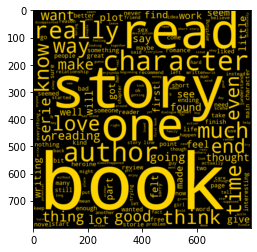

In [62]:
def grey_color_func(word, font_size, position,orientation,random_state=None, **kwargs):
    return("hsl(50,100%%, %d%%)" % np.random.randint(49,51))
wordcloud_2.recolor(color_func = grey_color_func)

plt.imshow(wordcloud_2, interpolation='bilinear')

plt.savefig("./Two_star_cloud.png")
plt.show()

In [64]:
# 3-star reviews

kindle_3 = kindle_data.loc[kindle_data["overall"] == 3, :]
kindle_3

,Unnamed: 0,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime
12,12,B000FA64PA,"[0, 0]",3,Well written. Interesting to see Sideous (thro...,"12 31, 2013",A2QK1U70OJ74P,Sharon Deem,Not bad; it is well written,1388448000
13,13,B000FA64PK,"[0, 0]",3,Troy Denning's novella Recovery was originally...,"03 15, 2012",A3SZMGJMV0G16C,"Andrew Pruette ""Rancors Love to Read""",Han and Leia reunited and Barabel Jedi introduced,1331769600
17,17,B000FA64PK,"[4, 4]",3,"Another well written eBook by Troy Denning, bu...","04 16, 2009",A38Z3Q6DTDIH9J,"Jimmy J. Shaw ""oldbent1""",Star Wars: The New Jedi Order: Recovery,1239840000
25,25,B000FA64QO,"[0, 0]",3,"The events of ""Ylesia"" take place during ""Dest...","08 7, 2012",A22CW0ZHY3NJH8,Noname,One huge chapter,1344297600
27,27,B000FBFMVG,"[5, 5]",3,Originally published as an e-book coinciding w...,"08 25, 2008",A3SZMGJMV0G16C,"Andrew Pruette ""Rancors Love to Read""",Short story featuring everyone's favorite Wookiee,1219622400
...,...,...,...,...,...,...,...,...,...,...
982279,982301,B00LYPIQRY,"[0, 0]",3,I love reading about Sasha's journey. The best...,"07 22, 2014",A1Z9O1HH589LM0,"JMitch ""JMitch""",Good installation,1405987200
982465,982487,B00LZFHL7Y,"[2, 4]",3,3.5 StarsNick buried his teenage daughter a ye...,"07 21, 2014",A3JGGHYBCHYSYU,J. Hagen,It was okay...nothing exceptional.,1405900800
982485,982507,B00LZKMXBI,"[2, 8]",3,This was not my favorite at all and I feel rea...,"07 21, 2014",A10OADQ60HQ244,Annie,"H.M. Ward is my favorite, just not this book.",1405900800
982509,982531,B00LZKMXBI,"[2, 8]",3,I enjoyed Second Chances. There were tear jerk...,"07 21, 2014",AKE0Y1J2NUN1A,jms1267,Second Chances,1405900800


In [67]:
word_list_3 = []
words_3 = ''
for review in kindle_3["reviewText"]:
    review_replace = review.replace(".", " ")
    review_replace = review_replace.replace("&#34;", " ")
    review_replace = review_replace.replace("*", " ")
    review_replace = review_replace.replace("(", " ")
    review_replace = review_replace.replace(")", " ")
    review_replace = review_replace.replace(",", " ")
    review_replace = review_replace.replace('''"''', " ")
    review_replace = review_replace.replace("?", " ")
    review_replace = review_replace.replace("!", " ")
    review_replace = review_replace.replace("/", " ")
    review_replace = review_replace.replace(":", " ")
#     word_split = review_replace.split(" ")
#     for word in word_split:
#         word = word.lower()
#         word_list_3.append(word)
    words_3 += review_replace

len(words_3)

0

In [14]:
# word_df_3 = pd.DataFrame(word_list_3)

# word_df_3[0].value_counts()

In [68]:
wordcloud_3 = WordCloud(
                width = 800, height = 800,
                background_color = "black"
                       ).generate(words_3)

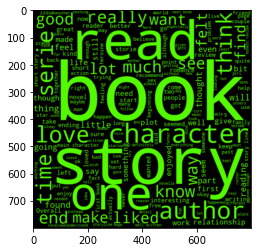

In [69]:
def grey_color_func(word, font_size, position,orientation,random_state=None, **kwargs):
    return("hsl(100,100%%, %d%%)" % np.random.randint(49,51))
wordcloud_3.recolor(color_func = grey_color_func)

plt.imshow(wordcloud_3, interpolation='bilinear')
plt.savefig("./Three_star_cloud.png")

plt.show()

In [3]:
# 4-star reviews

kindle_4 = kindle_data.loc[kindle_data["overall"] == 4, :]
kindle_4

,Unnamed: 0,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime
1,1,B000F83SZQ,"[2, 2]",4,This book is a reissue of an old one; the auth...,"01 6, 2014",AN0N05A9LIJEQ,critters,Different...,1388966400
2,2,B000F83SZQ,"[2, 2]",4,This was a fairly interesting read. It had ol...,"04 4, 2014",A795DMNCJILA6,dot,Oldie,1396569600
4,4,B000F83SZQ,"[0, 1]",4,"If you like period pieces - clothing, lingo, y...","03 19, 2014",A3SPTOKDG7WBLN,Father Dowling Fan,Period Mystery,1395187200
5,5,B000F83SZQ,"[0, 0]",4,A beautiful in-depth character description mak...,"05 26, 2014",A1RK2OCZDSGC6R,ubavka seirovska,Review,1401062400
6,6,B000F83SZQ,"[0, 0]",4,I enjoyed this one tho I'm not sure why it's c...,"06 10, 2014",A2HSAKHC3IBRE6,Wolfmist,Nice old fashioned story,1402358400
...,...,...,...,...,...,...,...,...,...,...
982537,982559,B00LZKMXBI,"[1, 1]",4,** I received an ARC for an honest review**Oka...,"07 23, 2014",AFC97KDPMJHXG,"Shanoff Reads ""Shanoff""",3.5 Stars from me...,1406073600
982546,982568,B00LZKMXBI,"[3, 3]",4,I received an advanced reader's copy of this b...,"07 21, 2014",A19DWIC1T7127Y,T,Moving On,1405900800
982554,982576,B00M029T4O,"[1, 1]",4,And Tatum O&#8217;Shea most definitely went ba...,"07 21, 2014",ASBYTWKXBRK6W,Jecca Reads-a-Lot,"Once you go bad, you never go back&#8230;",1405900800
982564,982586,B00M0RE7CS,"[2, 2]",4,Amelia Hill is a plain girl. She works at a ho...,"07 22, 2014",A20CM886HSEUWB,"Brittany ""~Brittany""",Definitely an Original Story,1405987200


In [4]:
words_4 = ''

for review in kindle_4["reviewText"]:
    review_replace = review.replace(".", " ")
    review_replace = review_replace.replace("&#34;", " ")
    review_replace = review_replace.replace("*", " ")
    review_replace = review_replace.replace("(", " ")
    review_replace = review_replace.replace(")", " ")
    review_replace = review_replace.replace(",", " ")
    review_replace = review_replace.replace('''"''', " ")
    review_replace = review_replace.replace("?", " ")
    review_replace = review_replace.replace("!", " ")
    review_replace = review_replace.replace("/", " ")
    review_replace = review_replace.replace(":", " ")
    words_4 += review_replace

In [5]:
# word_df_4 = pd.DataFrame(word_list_4)

# word_df_4[0].value_counts()

In [6]:
wordcloud_4 = WordCloud(
                width = 800, height = 800,
                background_color = "black"
).generate(words_4)

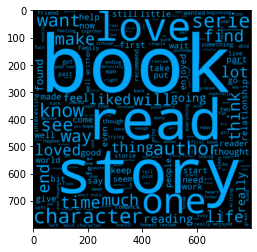

In [16]:
def grey_color_func(word, font_size, position,orientation,random_state=None, **kwargs):
    return("hsl(200,100%%, %d%%)" % np.random.randint(49,51))
wordcloud_4.recolor(color_func = grey_color_func)


plt.imshow(wordcloud_4, interpolation='bilinear')
plt.savefig("./Four_star_cloud.png")
plt.show()

In [8]:
# 5-star reviews

kindle_5 = kindle_data.loc[kindle_data["overall"] == 5, :]
kindle_5

,Unnamed: 0,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime
0,0,B000F83SZQ,"[0, 0]",5,I enjoy vintage books and movies so I enjoyed ...,"05 5, 2014",A1F6404F1VG29J,Avidreader,Nice vintage story,1399248000
3,3,B000F83SZQ,"[1, 1]",5,I'd never read any of the Amy Brewster mysteri...,"02 19, 2014",A1FV0SX13TWVXQ,"Elaine H. Turley ""Montana Songbird""",I really liked it.,1392768000
8,8,B000FA64PA,"[0, 0]",5,Darth Maul working under cloak of darkness com...,"10 11, 2013",A1UG4Q4D3OAH3A,dsa,Darth Maul,1381449600
10,10,B000FA64PA,"[0, 0]",5,I think I have this one in both book and audio...,"01 27, 2014",A1ZT7WV0ZUA0OJ,Mike,Audio and book,1390780800
14,14,B000FA64PK,"[0, 0]",5,I am not for sure on how much of a difference ...,"05 12, 2013",A3H8PE1UFK04JZ,Caleb Watts,Possibly Important,1368316800
...,...,...,...,...,...,...,...,...,...,...
982592,982614,B00M13FNSS,"[2, 2]",5,Yasss hunny! This is a great read. That Dre is...,"07 23, 2014",A2Y66HD4J5S7QZ,Candi,A Hot Read Indeed!!,1406073600
982593,982615,B00M13FNSS,"[0, 0]",5,I ENJOYED THIS BOOK FROM BEGINNING TO END NOW ...,"07 23, 2014",A17YHECC8H9NEY,Margie,VERY GOOD BOOK,1406073600
982594,982616,B00M13FNSS,"[1, 1]",5,Great book! Cherika was a fool. She let that m...,"07 23, 2014",A20KO0BPMNREJL,Nicki,Great Read,1406073600
982595,982617,B00M13FNSS,"[0, 0]",5,When I say this was an excellent book please b...,"07 23, 2014",A1BQO66R6OLCCW,Nikey,Wow!!,1406073600


In [9]:
words_5 = ''

for review in kindle_5["reviewText"]:
    review_replace = review.replace(".", " ")
    review_replace = review_replace.replace("&#34;", " ")
    review_replace = review_replace.replace("*", " ")
    review_replace = review_replace.replace("(", " ")
    review_replace = review_replace.replace(")", " ")
    review_replace = review_replace.replace(",", " ")
    review_replace = review_replace.replace('''"''', " ")
    review_replace = review_replace.replace("?", " ")
    review_replace = review_replace.replace("!", " ")
    review_replace = review_replace.replace("/", " ")
    review_replace = review_replace.replace(":", " ")

    words_5 += review_replace



In [10]:
# word_df_5 = pd.DataFrame(word_list_5)

# word_df_5[0].value_counts()

In [11]:
wordcloud_5 = WordCloud(
                width = 800, height = 800,
                background_color = "black"
).generate(words_5)

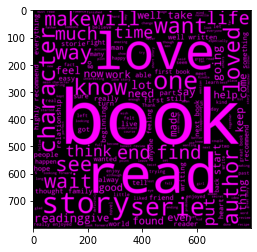

In [15]:
def grey_color_func(word, font_size, position,orientation,random_state=None, **kwargs):
    return("hsl(300,100%%, %d%%)" % np.random.randint(49,51))
wordcloud_5.recolor(color_func = grey_color_func)


plt.imshow(wordcloud_5, interpolation='bilinear')
plt.savefig("./Five_star_cloud.png")
plt.show()